In [856]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [857]:
df = pd.read_csv("laptop.csv")

In [858]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
491,491,Toshiba,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,149130.7200
758,758,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,152859.7872
1224,1224,Dell,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.08kg,27119.5200
824,824,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg,99900.0000
768,768,Samsung,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.31kg,85194.7200


In [859]:
df=df.drop(columns="Unnamed: 0")

In [860]:
df.shape

(1303, 11)

In [861]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [863]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [864]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [865]:
import re
a = df['Ram'].apply(lambda x: int(re.search(r'\d+', x).group()))#re.search sesrch krega numerical
print(a)

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64


In [866]:
df["Ram"]=a

In [867]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [868]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [869]:
a = df['Weight'].apply(lambda x: float(re.search(r'(\d*\.?\d+)', x).group()))

In [870]:
a

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [871]:
df["Weight"]=a

In [872]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
457,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252,52693.9200
1013,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.540,100550.5488
1034,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.840,65480.5872
918,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.600,71874.7200
225,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.200,44328.9600


In [873]:
df.iloc[0:2,0:6]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8


In [874]:
df.iloc[0:2,6:12]

,Memory,Gpu,OpSys,Weight,Price
0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


<Axes: xlabel='Price', ylabel='Count'>

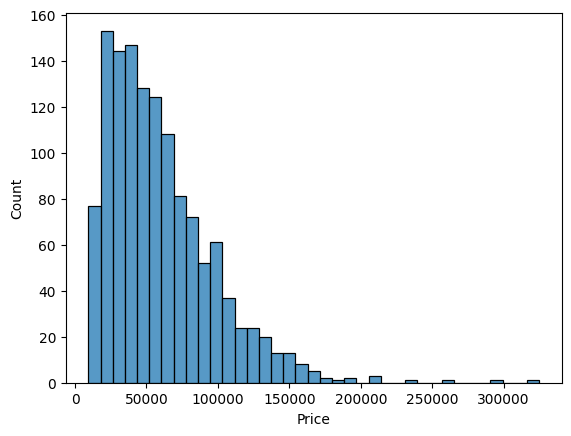

In [875]:
sns.histplot(df["Price"])#skewed h 

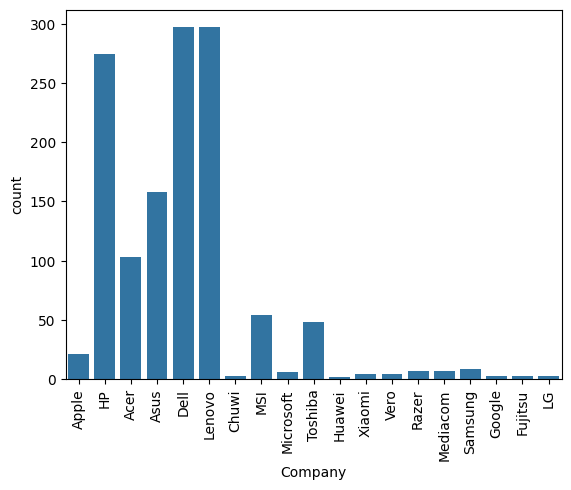

In [876]:
sns.countplot(x=df["Company"])
plt.xticks(rotation="vertical")
plt.show()

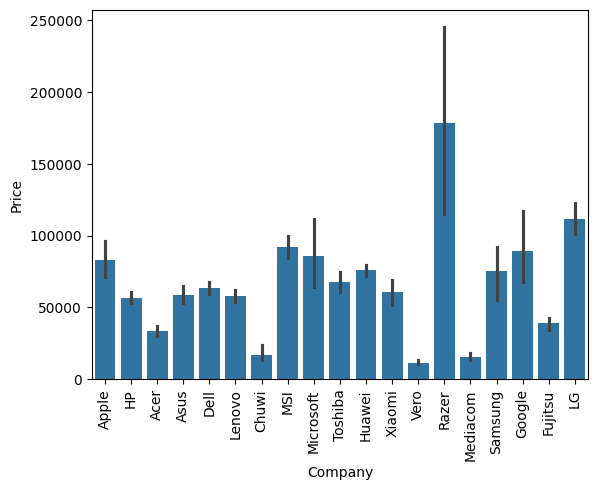

In [877]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='TypeName'>

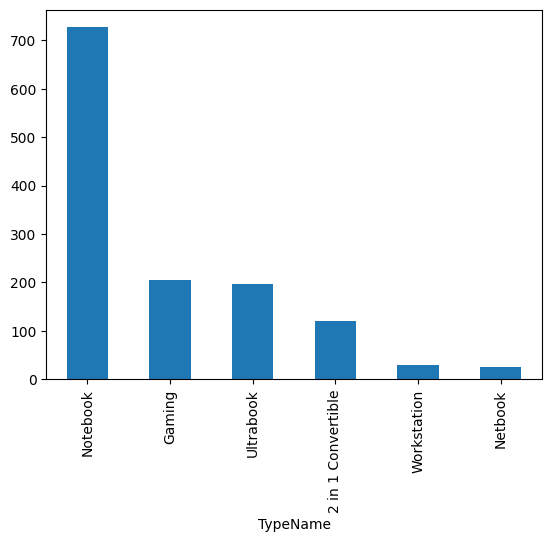

In [878]:
df["TypeName"].value_counts().plot(kind="bar")

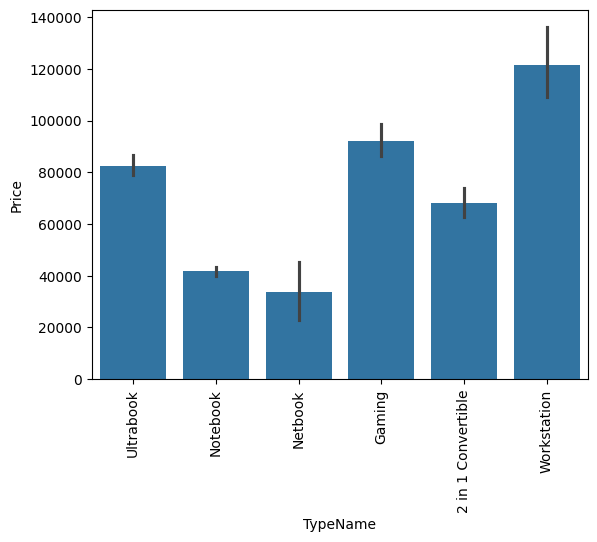

In [879]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [880]:
df["ScreenResolution"].unique() 


array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [881]:
df["ScreenResolution"]

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [882]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x :1 if "Touchscreen" in x else 0 )

In [883]:
df["Touchscreen"].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [884]:
df["IPS"]=df["ScreenResolution"].apply(lambda x :1 if "IPS" in x else 0 )

In [885]:
df["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

In [886]:
df["HD"]=df["ScreenResolution"].apply(lambda x :1 if "HD" in x else 0 )
df["HD"].value_counts()

HD
1    916
0    387
Name: count, dtype: int64

In [887]:
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [888]:
y_reso=df["ScreenResolution"].str.split("x").str[-1]

In [889]:
x_reso=df["ScreenResolution"].str.split("x").str[0]

In [890]:
x_reso.str.split(" ").str[-1]

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: ScreenResolution, Length: 1303, dtype: object

In [891]:
x_reso=x_reso.str.split(" ").str[-1]

In [892]:
df["X resolution"]=x_reso
df["Y resolution"]=y_reso

In [893]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,HD,X resolution,Y resolution
859,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.20,24988.320,0,0,1,1920,1080
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.160,1,0,1,3840,2160
946,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics,Windows 10,1.36,78438.816,1,0,1,1920,1080
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.10,38148.480,0,1,1,1920,1080
280,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,45767.520,0,0,0,1600,900


In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  HD                1303 non-null   int64  
 14  X resolution      1303 non-null   object 
 15  Y resolution      1303 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory 

In [895]:
df["X resolution"]=df["X resolution"].astype("int64")
df["Y resolution"]=df["Y resolution"].astype("int64")

In [896]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
HD              0.377209
X resolution    0.556529
Y resolution    0.552809
Name: Price, dtype: float64

In [897]:
df["PPI"]=((df["X resolution"]**2 + df["Y resolution"]**2)**0.5)/df["Inches"]

In [898]:
df["PPI"]

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [899]:
df=df.drop(columns=["X resolution","Y resolution", "Inches","ScreenResolution"])

In [900]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,0,100.454670


In [901]:
Storage=df["Memory"].str.split(" ").str[0]
Storage_type = df["Memory"].str.split(" ").str[1:].str.join(" ")

df.insert(6, 'Storage', Storage)
df.insert(7, 'Storage Type', Storage_type)

In [902]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI
92,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,512GB,SSD,Windows 10,1.49,63776.16,0,0,1,165.632118
889,Lenovo,Notebook,AMD A4-Series 7210 2.2GHz,4,500GB HDD,AMD Radeon R3,500GB,HDD,Windows 10,2.80,20193.12,0,0,0,106.113062
216,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 940MX,1TB,HDD,No OS,2.80,31381.92,0,0,0,106.113062
741,Dell,Notebook,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,256GB,SSD,Windows 10,2.00,35431.20,0,0,0,100.454670
979,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,256GB,SSD + 1TB HDD,Windows 10,2.99,93186.72,0,0,1,127.335675


In [903]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [904]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [905]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [906]:
processor_name=df["Cpu"].str.split(" ").str[0]
processor_name=list(processor_name)
print(processor_name.count("Intel"))
print(processor_name.count("AMD"))

1240
62


In [907]:
processor_name=df["Cpu"].str.split(" ").str[0:4]
processor_name=list(processor_name)

count=0
for i in processor_name:
        if(i[0]=="Intel" and i[1]=="Core" ):
            count=count+1
count

1105

In [908]:
counti3=0
counti5=0
counti7=0
for i in processor_name:
        if(i[0]=="Intel" and i[1]=="Core" and i[2]=='i3' ):
            counti3=counti3+1
        if(i[0]=="Intel" and i[1]=="Core" and i[2]=='i5' ):
            counti5=counti5+1
        if(i[0]=="Intel" and i[1]=="Core" and i[2]=='i7' ):
            counti7=counti7+1       
print(counti3)            
print(counti5)
print(counti7)

136
423
527


In [909]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [910]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,128GB,SSD,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,128GB,Flash Storage,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,256GB,SSD,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5


In [911]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [912]:

df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [913]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu Name,Cpu brand
1059,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,256GB,SSD + 1TB HDD,Windows 10,2.94,96916.32,0,0,1,141.211998,Intel Core i7,Intel Core i7
1084,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,256GB,SSD,Windows 10,2.18,39960.00,0,0,1,141.211998,Intel Core i5,Intel Core i5
620,HP,Notebook,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,256GB,SSD,Windows 10,2.31,59886.72,0,0,0,111.935204,Intel Core i5,Intel Core i5
461,Acer,Netbook,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,128GB,SSD,Windows 10,1.40,23176.80,0,0,0,135.094211,Intel Celeron Dual,Other Intel Processor
753,Lenovo,Ultrabook,Intel Core i5 6200U 2.3GHz,4,180GB SSD,Intel HD Graphics 520,180GB,SSD,Windows 10,1.70,58394.88,0,0,1,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand', ylabel='Price'>

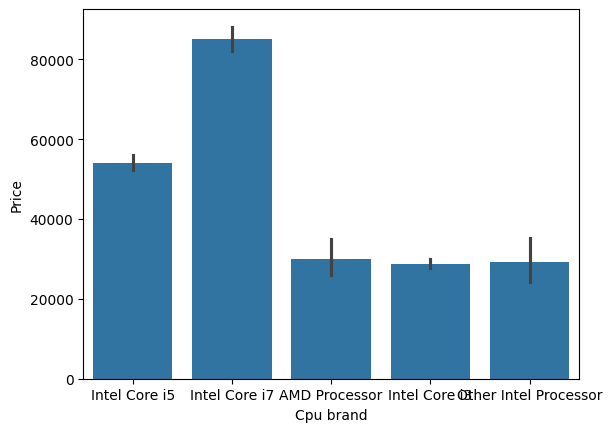

In [914]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])

In [915]:
df=df.drop(columns=["Cpu","Cpu Name"])

In [916]:
df["Ram"].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [917]:
df["Weight"].value_counts()

Weight
2.200    126
2.100     58
2.000     45
2.400     44
2.300     41
        ... 
0.990      1
2.591      1
2.210      1
2.191      1
2.340      1
Name: count, Length: 171, dtype: int64

In [918]:
i=["Ram","Weight"]

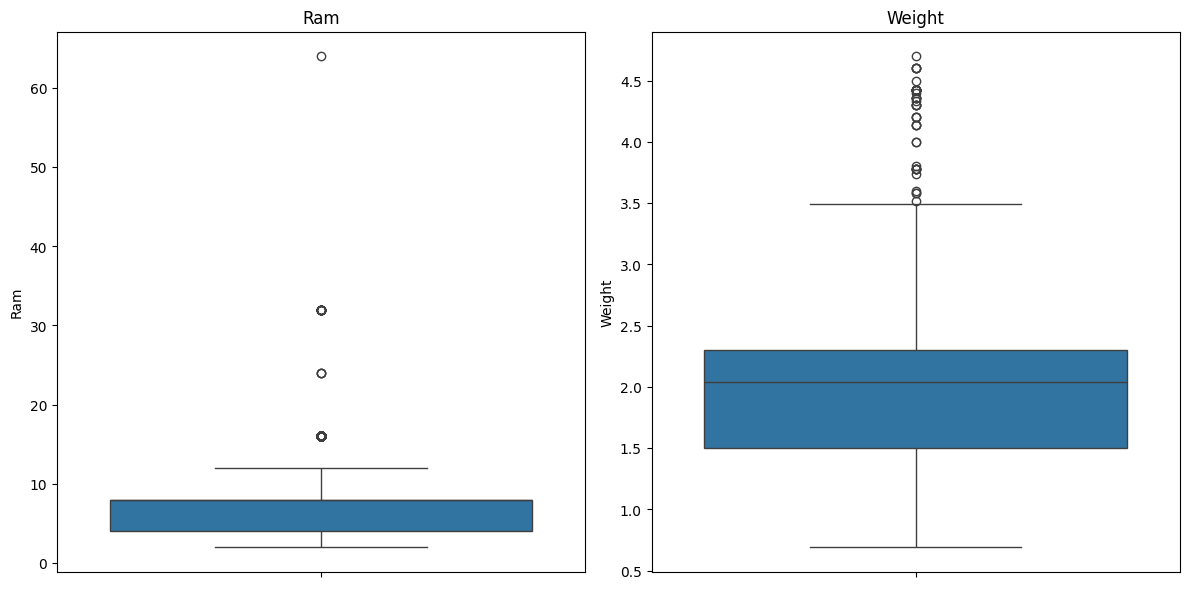

In [919]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.boxplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()


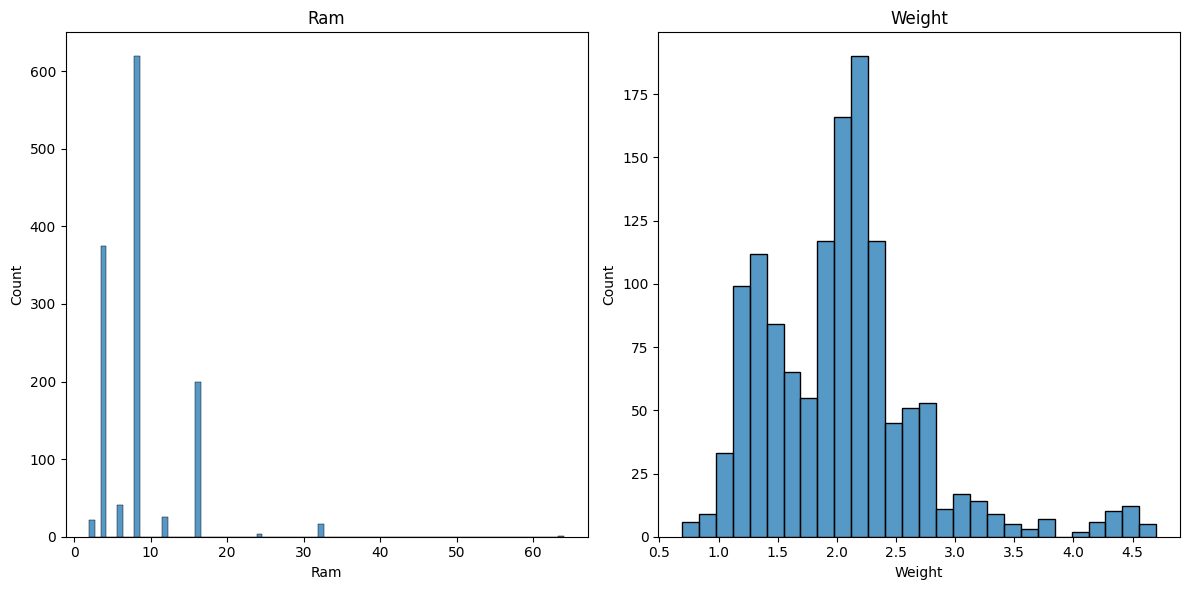

In [920]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.histplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()


In [921]:
df[df["Ram"]==64]

,Company,TypeName,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand
1066,Asus,Gaming,64,1TB SSD,Nvidia GeForce GTX 980,1TB,SSD,Windows 10,3.58,211788.0,0,1,1,127.335675,Intel Core i7


In [922]:
for col in i:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()
    df[i] = np.where(
        df[i]>upper_limit,
        upper_limit,
        np.where(
            df[i]<lower_limit,
            lower_limit,
            df[i]
    )
)

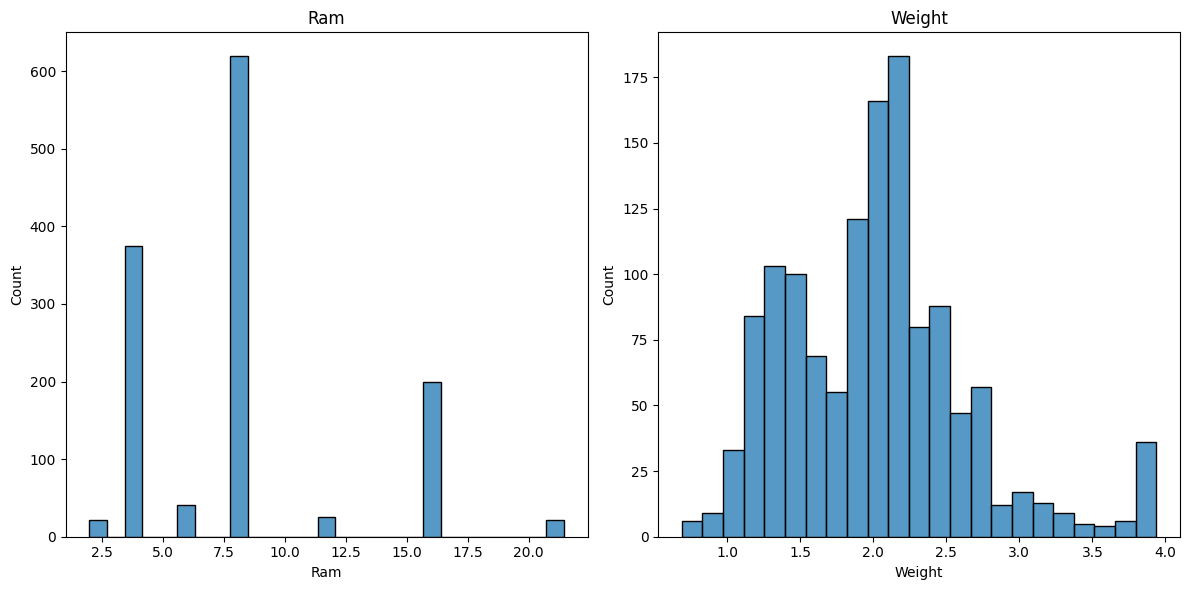

In [923]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.histplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()


In [924]:
for col in i:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

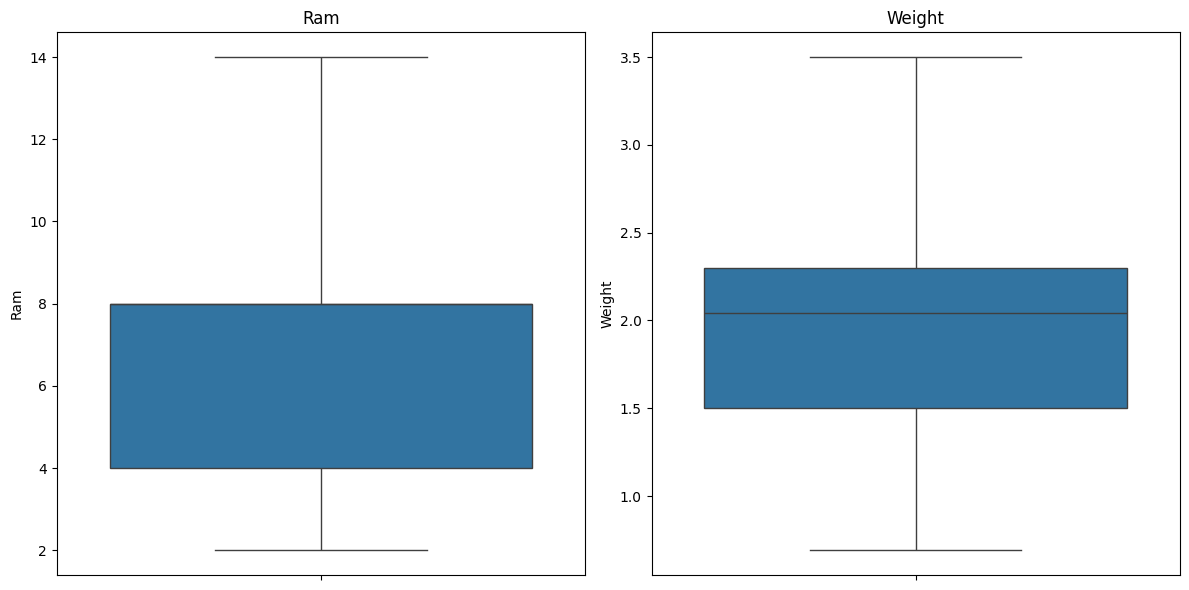

In [925]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
col_idx = 0

for col in i:
    sns.boxplot(df[col], ax=axs[col_idx])
    axs[col_idx].set_title(col) 
    col_idx += 1

plt.tight_layout()
plt.show()

In [926]:
df.sample()

,Company,TypeName,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand
1216,Acer,Notebook,4.0,1TB HDD,Nvidia GeForce 940MX,1TB,HDD,Windows 10,3.3,31861.44,0,0,0,106.113062,Intel Core i3


In [927]:
df["Storage Type"].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

In [928]:


# Clean up the 'Memory' column
df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '').str.replace('GB', '').str.replace('TB', '1024')

# Split the 'Memory' column into two parts
memory_split = df['Memory'].str.split("+", n=1, expand=True)

# Process the first part
df["first"] = memory_split[0].str.strip()
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.extract('(\d+)').astype(float)

# Process the second part
memory_split[1].fillna("0", inplace=True)
df["second"] = memory_split[1].str.extract('(\d+)').astype(float)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)

# Calculate storage capacities
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)




<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_33821/1663727768.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '').str.replace('GB', '').str.replace('TB', '1024')
/tmp/ipykernel_33821/1663727768.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['first'] = df['first'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_33821/1663727768.py:17: SyntaxWarning: invalid escape sequence '\d'
  df["second"] = memory_split[1].str.extract('(\d+)').astype(float)
/tmp/ipykernel_33821/1663727768.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 

In [929]:
df

,Company,TypeName,Ram,Memory,Gpu,Storage,Storage Type,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,128GB,SSD,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,128GB,Flash Storage,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,256GB,SSD,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,14.0,512 SSD,AMD Radeon Pro 455,512GB,SSD,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,256GB,SSD,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4.0,128 SSD,Intel HD Graphics 520,128GB,SSD,Windows 10,1.80,33992.6400,1,1,1,157.350512,Intel Core i7,0.0,128.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,14.0,512 SSD,Intel HD Graphics 520,512GB,SSD,Windows 10,1.30,79866.7200,1,1,1,276.053530,Intel Core i7,0.0,512.0,0.0,0.0
1300,Lenovo,Notebook,2.0,64 Flash Storage,Intel HD Graphics,64GB,Flash Storage,Windows 10,1.50,12201.1200,0,0,0,111.935204,Other Intel Processor,0.0,0.0,0.0,64.0
1301,HP,Notebook,6.0,11024 HDD,AMD Radeon R5 M330,1TB,HDD,Windows 10,2.19,40705.9200,0,0,0,100.454670,Intel Core i7,11024.0,0.0,0.0,0.0


In [930]:
df=df.drop("Storage",axis=1)
df=df.drop("Storage Type",axis=1)
df=df.drop("Memory",axis=1)

In [931]:
num_cols = df.select_dtypes(include=['number'])
num_cols

,Ram,Weight,Price,Touchscreen,IPS,HD,PPI,HDD,SSD,Hybrid,Flash_Storage
0,8.0,1.37,71378.6832,0,1,0,226.983005,0.0,128.0,0.0,0.0
1,8.0,1.34,47895.5232,0,0,0,127.677940,0.0,0.0,0.0,128.0
2,8.0,1.86,30636.0000,0,0,1,141.211998,0.0,256.0,0.0,0.0
3,14.0,1.83,135195.3360,0,1,0,220.534624,0.0,512.0,0.0,0.0
4,8.0,1.37,96095.8080,0,1,0,226.983005,0.0,256.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1298,4.0,1.80,33992.6400,1,1,1,157.350512,0.0,128.0,0.0,0.0
1299,14.0,1.30,79866.7200,1,1,1,276.053530,0.0,512.0,0.0,0.0
1300,2.0,1.50,12201.1200,0,0,0,111.935204,0.0,0.0,0.0,64.0
1301,6.0,2.19,40705.9200,0,0,0,100.454670,11024.0,0.0,0.0,0.0


In [932]:
num_cols=num_cols.columns.tolist()

In [933]:
num_cols

['Ram',
 'Weight',
 'Price',
 'Touchscreen',
 'IPS',
 'HD',
 'PPI',
 'HDD',
 'SSD',
 'Hybrid',
 'Flash_Storage']

In [934]:
df[num_cols].corr()["Price"]

Ram              0.718398
Weight           0.147100
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
HD               0.377209
PPI              0.473487
HDD             -0.308799
SSD              0.398314
Hybrid          -0.005061
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [935]:
df=df.drop(columns=["Hybrid","Flash_Storage"])

In [936]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD
137,Asus,Gaming,8.0,Nvidia GeForce GTX 1050,Windows 10,3.0,49976.64,0,0,1,127.335675,Intel Core i5,0.0,128.0


In [937]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [938]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [939]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD,Gpu brand
715,Lenovo,Notebook,8.0,Nvidia GeForce 920MX,Windows 10,1.87,45664.6896,0,1,1,157.350512,Intel Core i5,0.0,256.0,Nvidia


In [940]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [941]:
df = df[df['Gpu brand'] != 'ARM']

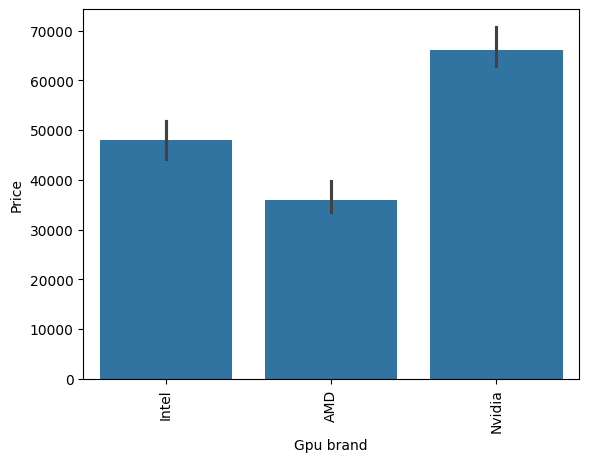

In [942]:

sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [943]:
df.drop(columns=['Gpu'],inplace=True)

In [944]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,14.0,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0.0,256.0,Intel


In [945]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [946]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [947]:
df['OS'] = df['OpSys'].apply(cat_os)


In [948]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14.0,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [949]:
df=df.drop(columns="OpSys")

In [950]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,HD,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
1047,MSI,Gaming,14.0,3.50,82351.6992,0,1,1,127.335675,Intel Core i7,0.0,256.0,Nvidia,Windows
628,Asus,2 in 1 Convertible,6.0,1.50,34046.4528,1,0,1,165.632118,Intel Core i5,11024.0,0.0,Intel,Windows
461,Acer,Netbook,4.0,1.40,23176.8000,0,0,0,135.094211,Other Intel Processor,0.0,128.0,Intel,Windows
1275,Asus,Ultrabook,8.0,1.20,38841.1200,0,1,1,165.632118,Other Intel Processor,0.0,512.0,Intel,Windows
45,Apple,Ultrabook,8.0,1.37,75604.3200,0,1,0,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


<Axes: >

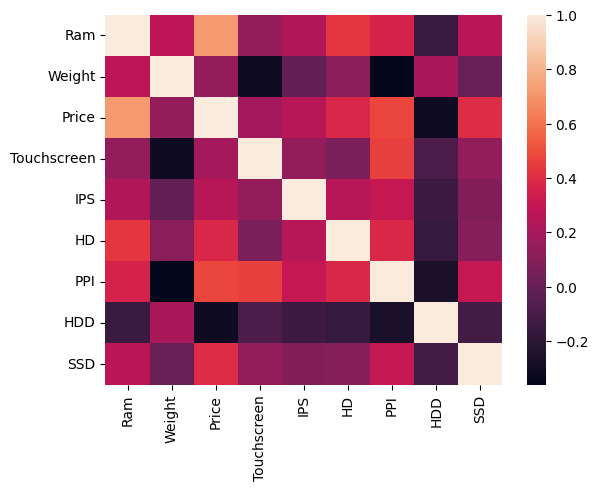

In [951]:
num_cols.remove("Hybrid")
num_cols.remove("Flash_Storage")
sns.heatmap(df[num_cols].corr())

<Axes: xlabel='Price', ylabel='Count'>

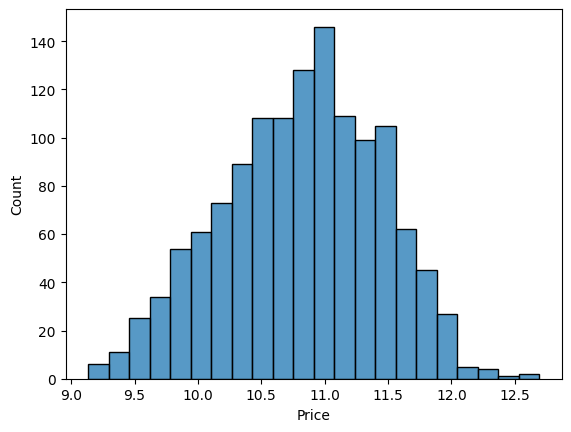

In [952]:
sns.histplot(np.log(df['Price']))

In [954]:
df=df.drop(columns=["HD"])

In [955]:
df.rename(columns={'IPS': 'Ips', 'PPI': 'ppi', 'OS': 'os'}, inplace=True)

In [956]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [957]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14.0,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4.0,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,14.0,1.30,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1300,Lenovo,Notebook,2.0,1.50,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6.0,2.19,0,0,100.454670,Intel Core i7,11024.0,0.0,AMD,Windows


In [958]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [959]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=20)


In [960]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
572,HP,Notebook,6.0,1.95,0,1,141.211998,AMD Processor,0.0,256.0,AMD,Windows
343,Lenovo,2 in 1 Convertible,14.0,1.40,1,1,316.965060,Intel Core i7,0.0,512.0,Intel,Windows
975,HP,Notebook,8.0,2.04,0,1,141.211998,Intel Core i5,0.0,128.0,Nvidia,Windows
495,Lenovo,Ultrabook,8.0,1.30,0,1,125.367428,Intel Core i5,0.0,180.0,Intel,Windows
679,Acer,Gaming,14.0,2.50,0,0,141.211998,Intel Core i5,0.0,256.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Dell,2 in 1 Convertible,14.0,2.77,1,0,127.335675,Intel Core i7,0.0,512.0,Nvidia,Windows
924,Lenovo,2 in 1 Convertible,8.0,1.37,1,1,165.632118,Intel Core i5,0.0,512.0,Intel,Windows
1248,Lenovo,Notebook,8.0,2.30,0,1,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
271,Asus,Gaming,14.0,3.20,0,0,127.335675,AMD Processor,0.0,256.0,AMD,Windows


In [961]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [962]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [963]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,14.0,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [964]:
import sklearn
print(sklearn.__version__)


1.6.1


In [965]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8706707549380786
MAE 0.1633511305425253


In [966]:
import pickle

pickle.dump(df,open('df.pkl','wb'))#taaki categorical col nikalsku
pickle.dump(pipe,open('pipe.pkl','wb'))
